In [3]:
import numpy as np
import matplotlib.pyplot as plt

v = [2,4]
w = [4,2]

array = np.array([[0, 0, v[0], v[1]], 
                  [1, 1, w[0], w[1]]])

X, Y, V, W = zip(*array)
print (X, Y, V, W)

(0, 1) (0, 1) (2, 4) (4, 2)


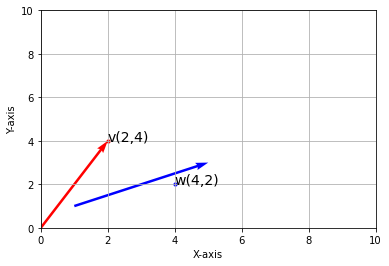

In [8]:
plt.figure()
plt.ylabel('Y-axis')
plt.xlabel('X-axis')
ax = plt.gca()
ax.annotate(f'v({v[0]},{v[1]})', (v[0],v[1]),fontsize=14)
plt.scatter(v[0],v[1], s=10,c='red')
ax.annotate(f'w({w[0]},{w[1]})', (w[0],w[1]),fontsize=14)
plt.scatter(w[0], w[1], s=10,c='blue')
ax.quiver(X, Y, V, W, angles='xy', scale_units='xy',color=['r','b'],scale=1)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])

plt.grid()
plt.draw()
plt.show()

In [73]:
p_c = np.array([[0],[0],[1/2],[1]]) 
print('p_c = ', np.array2string(p_c, prefix='Array: '))

print('\n')

p_p = np.array([[0],[0],[1/2],[1]]) 
print('p_p = ', np.array2string(p_p, prefix='Array: '))

p_c =  [[0. ]
        [0. ]
        [0.5]
        [1. ]]


p_p =  [[0. ]
        [0. ]
        [0.5]
        [1. ]]


In [74]:
# Rotation 
R_pc = np.eye(3,3)
print('\n')
print('R_pc = ', np.array2string(R_pc, prefix='Array:  '))
# Translation 
t_pc = np.array([[1.5],[1],[1/2]]) 
print('\n')
print('t_pc = ', np.array2string(t_pc, prefix='Array:  '))



R_pc =  [[1. 0. 0.]
         [0. 1. 0.]
         [0. 0. 1.]]


t_pc =  [[1.5]
         [1. ]
         [0.5]]


In [75]:
T_pc = np.block([[R_pc,                     t_pc],
                [np.zeros((1, 3)),             1]])
print('T_pc = ', np.array2string(T_pc, prefix='Array:  '))

T_pc =  [[1.  0.  0.  1.5]
         [0.  1.  0.  1. ]
         [0.  0.  1.  0.5]
         [0.  0.  0.  1. ]]


In [60]:
T_cp = np.linalg.inv(T_pc)
print('T_cp = ', np.array2string(T_cp, prefix='Array:  '))

T_cp =  [[ 1.   0.   0.  -1.5]
         [ 0.   1.   0.  -1. ]
         [ 0.   0.   1.  -0.5]
         [ 0.   0.   0.   1. ]]


In [77]:
# p_c w.r.t. F{p}
p_pc = T_pc @ p_c
print('p_c w.r.t. F{p} = \n', np.array2string(p_pc, prefix=' '))

p_c w.r.t. F{p} = 
 [[1.5]
  [1. ]
  [1. ]
  [1. ]]


In [78]:
# p_p w.r.t. F{c}
p_cp = T_cp @ p_p
print('p_p w.r.t. F{c} = \n', np.array2string(p_cp, prefix=' '))

p_p w.r.t. F{c} = 
 [[-1.5]
  [-1. ]
  [ 0. ]
  [ 1. ]]


In [103]:
# Rotate p_c by -45 degrees about the x-axis w.r.t. F{c}
theta = - np.pi/4;

Ry = np.array([[ 1,  0,              0             , 0],
               [ 0,  np.cos(theta),  -np.sin(theta), 0],
               [ 0,  np.sin(theta),  np.cos(theta) , 0],
               [ 0,  0,              0,              1]])


print('\nRotation sbout the x-axis:\n') 
print('Ry = \n', np.array2string(Ry, prefix=' '))



Rotation sbout the x-axis:

Ry = 
 [[ 1.          0.          0.          0.        ]
  [ 0.          0.70710678  0.70710678  0.        ]
  [ 0.         -0.70710678  0.70710678  0.        ]
  [ 0.          0.          0.          1.        ]]


In [108]:
# p_c rotated by -45 degrees about the x-axis w.r.t. F{c}
p_c_rotated = Ry @ p_c
print('p_c rotated = \n', np.array2string(p_c_rotated, prefix=' '))

p_c rotated = 
 [[0.        ]
  [0.35355339]
  [0.35355339]
  [1.        ]]


In [109]:
# The same rotated point now represented w.r.t. F{p}
p_c_rotated_p = T_pc @ (Ry @ p_c)
print('p_c rotated w.r.t. F{p}= \n', np.array2string(p_c_rotated_p, prefix=' '))

p_c rotated w.r.t. F{p}= 
 [[1.5       ]
  [1.35355339]
  [0.85355339]
  [1.        ]]


In [113]:
# Example from https://towardsdatascience.com/the-one-stop-guide-for-transformation-matrices-cea8f609bdb1
import numpy as np
import matplotlib.pyplot as plt
from pytransform3d.plot_utils import make_3d_axis
from pytransform3d.transform_manager import TransformManager
from scipy.spatial.transform import Rotation

In [114]:
TB2A = np.eye(4)
R = Rotation.from_euler("XYZ",[75,0,-45], degrees=True).as_matrix()
TB2A[:3,:3] = R
TB2A[:3,3] = np.array([1,5,3])
print('TB2A= \n', np.array2string(TB2A, prefix=' '))


TA2B = np.linalg.inv(TB2A)

TD2A = np.eye(4)
R = Rotation.from_euler("XYZ",[-2,-90,-45], degrees=True).as_matrix()
TD2A[:3,:3] = R
TD2A[:3,3] = np.array([2,-5,2])
TA2D = np.linalg.inv(TD2A)

TC2B = np.eye(4)
R = Rotation.from_euler("XYZ",[45,45,0], degrees=True).as_matrix()
TC2B[:3,:3] = R
TC2B[:3,3] = np.array([1,2,3])
TB2C = np.linalg.inv(TC2B)

# Define few points from different frames to frame A
origin_c_in_a = TB2A@TC2B@np.array([0,0,0,1]).reshape(4,1)
point_P_c_in_a = TB2A @ TC2B @ np.array([2,0,0,1]).reshape(4,1)
origin_d_in_a = TD2A @ np.array([0,0,0,1]).reshape(4,1)

# Define few points from different frames to frame B
origin_a_in_b = TA2B@np.array([0,0,0,1]).reshape(4,1)
origin_c_in_b = TC2B@np.array([0,0,0,1]).reshape(4,1)
origin_d_in_b = TA2B@TD2A@np.array([0,0,0,1]).reshape(4,1)
point_P_c_in_b = TC2B @ np.array([2,0,0,1]).reshape(4,1)

TB2A= 
 [[ 0.70710678  0.70710678  0.          1.        ]
  [-0.1830127   0.1830127  -0.96592583  5.        ]
  [-0.6830127   0.6830127   0.25881905  3.        ]
  [ 0.          0.          0.          1.        ]]


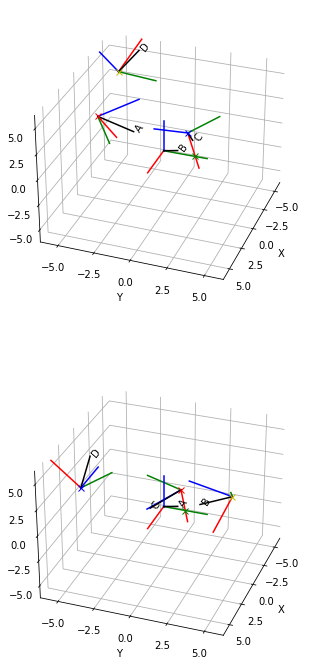

In [112]:
tm = TransformManager()
tm.add_transform("A", "B", TA2B)
tm.add_transform("B","C",TB2C)
tm.add_transform("A", "D", TA2D)

plt.figure(figsize=(8, 12))

ax = make_3d_axis(6, 211)
ax = tm.plot_frames_in("B", ax=ax, s=3)
ax.plot(*origin_a_in_b[:3],"rx")
ax.plot(*origin_c_in_b[:3],"bx")
ax.plot(*origin_d_in_b[:3],"yx")
ax.plot(*point_P_c_in_b[:3],"gx")
ax.view_init(30, 20)

ax = make_3d_axis(6, 212)
ax = tm.plot_frames_in("A", ax=ax,s=3)
ax.plot(*(1,5,3), "yx")
ax.plot(*origin_c_in_a[:3], "rx")
ax.plot(*point_P_c_in_a[:3], "gx")
ax.plot(*origin_d_in_a[:3],"bx")
ax.view_init(30, 20)
plt.show()

In [60]:
theta = np.pi/4;

R_theta = np.array([[np.sin(theta),  -np.cos(theta), 0 ],
          [np.cos(theta),   np.sin(theta), 0 ],
          [ 0,               0,             1]])
R_theta

array([[ 0.70710678, -0.70710678,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [61]:
phi = np.pi/3;

R_phi = np.array([[np.sin(phi),  -np.cos(phi), 0 ],
          [np.cos(phi),   np.sin(phi), 0 ],
          [ 0,               0,             1]])
R_phi

array([[ 0.8660254, -0.5      ,  0.       ],
       [ 0.5      ,  0.8660254,  0.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [62]:
T_01 = np.array([[1,  0, 8 ],
                 [0,  1, 9 ],
                 [0,  0, 1 ]])
print(T_01)


[[1 0 8]
 [0 1 9]
 [0 0 1]]


In [63]:
T_02 = np.array([[1,  0, 18 ],
                 [0,  1, 9 ],
                 [0,  0, 1 ]])

print(T_02)

[[ 1  0 18]
 [ 0  1  9]
 [ 0  0  1]]


In [64]:
p_1 = np.array([[5],
                [0],
                [1]])
p_1

array([[5],
       [0],
       [1]])

In [65]:
q_2 = np.array([[2],
                [0],
                [1]])
q_2

array([[2],
       [0],
       [1]])

In [66]:
p_0 =  T_01 @ R_theta @ p_1
p_0

array([[11.53553391],
       [12.53553391],
       [ 1.        ]])

In [67]:
q_0 =  T_02 @ R_phi @ q_2
q_0

array([[19.73205081],
       [10.        ],
       [ 1.        ]])

In [69]:
R_phi @ q_2


array([[1.73205081],
       [1.        ],
       [1.        ]])

In [70]:
T_02 @ R_phi @ q_2


array([[19.73205081],
       [10.        ],
       [ 1.        ]])